## Import Module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import regex as re
from nltk import tokenize
from nltk.corpus import stopwords

## Read Data

In [ ]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/fatimahnadiaekaputri/nlpdisastertweets/a3aab2d65977c05f78869b43b38847fa0904dfcd/tweets.csv')
raw_df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
raw_df.shape
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


### Cleaning

In [ ]:
raw_df[raw_df.duplicated(subset=['text', 'target'])]

,id,keyword,location,text,target
103,103,aftershock,"fresno, ca",thinking about how some1 spat blood at me duri...,0
292,292,annihilation,NaN,[AUS] Vic Bushfire Appeal | Doggos | Animal Fa...,0
771,771,bioterror,Planet Earth,The human cull (from 38mins30secs https://t.co...,0
787,787,bioterror,NaN,Does the push for mass vaccination point towar...,0
808,808,bioterror,United States,Does the push for vaccination point to a stage...,0
...,...,...,...,...,...
10847,10847,war%20zone,"Chicago, IL",War Zone [prod. By Legacy] https://t.co/pwUCnq...,0
11126,11126,windstorm,NaN,"From what I've seen with other RW boycotts, th...",0
11184,11184,wounded,NaN,Man arrested after 8 wounded in stabbing spree...,1
11313,11313,wreckage,"Lamella, your objet a",Coffee and wreckage of dreams,0


In [ ]:
raw_df.drop_duplicates(subset=['text', 'target'], inplace=True)
print(raw_df.shape)

(11225, 5)


In [ ]:
raw_df.isnull().sum()

id             0
keyword        0
location    3382
text           0
target         0
dtype: int64

In [ ]:
raw_df.dropna(subset=['text', 'target'], inplace=True)

## Exploratory Data Analysis (EDA) & Visualizing

In [ ]:
# exploration to count the amount of data for each keyword
keyword_count_df = raw_df['keyword'].value_counts().reset_index(name='count')
print(keyword_count_df)

             index  count
0     thunderstorm     92
1        flattened     87
2    mass%20murder     84
3            drown     82
4         engulfed     81
..             ...    ...
214   electrocuted     15
215      rainstorm     11
216          siren     10
217        deluged     10
218        tsunami      6

[219 rows x 2 columns]


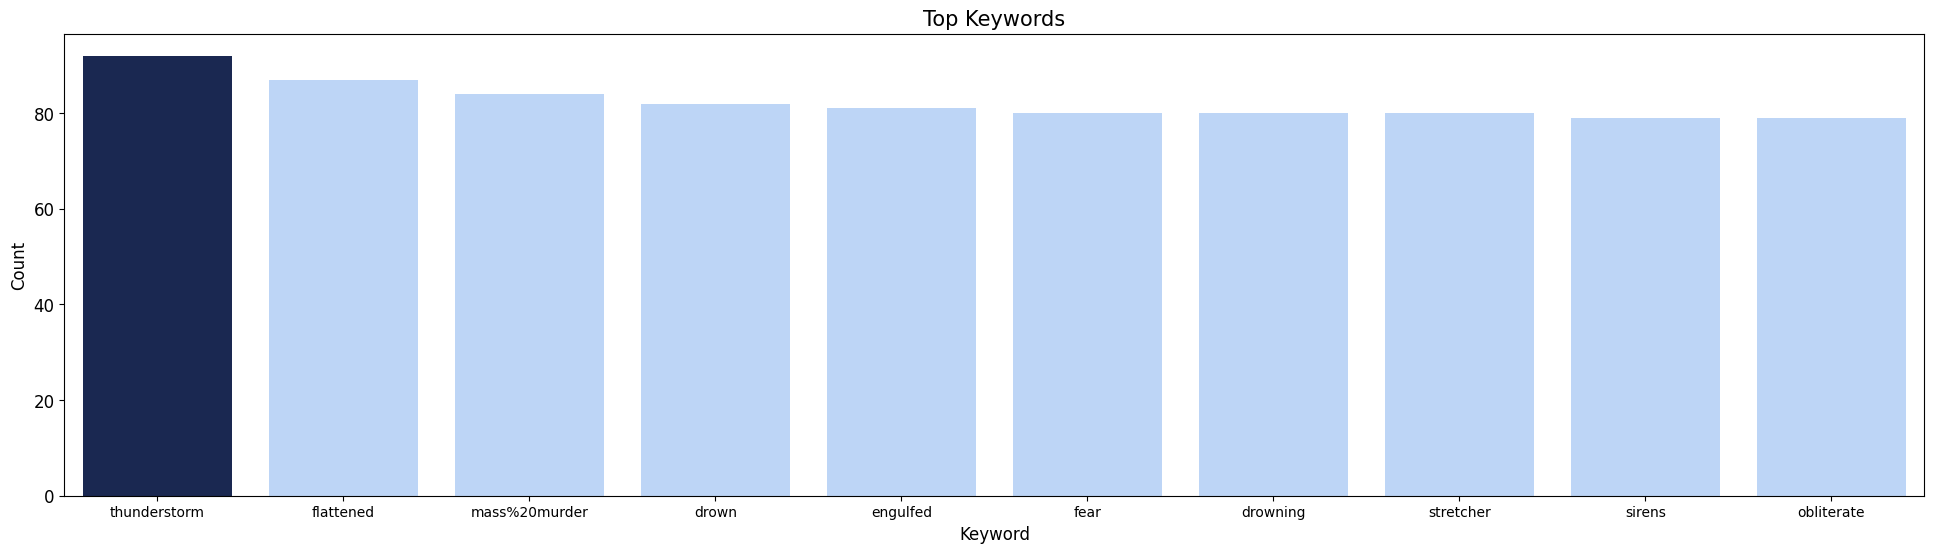

In [ ]:
# visualizing the keyword_count
fig, ax = plt.subplots(figsize=(24, 6))
colors = ["#11235A", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF"]

sns.barplot(x='index', y='count', data=keyword_count_df.head(10), palette=colors, hue="index", legend="auto")

plt.title("Top Keywords", loc="center", fontsize=15)
plt.xlabel("Keyword", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.show()

In [ ]:
# exploration to count the amount of data for each location
location_count_df = raw_df['location'].value_counts().reset_index(name='count')
print(location_count_df)

                               index  count
0                      United States     93
1                          Australia     82
2                    London, England     81
3                                 UK     75
4                              India     74
...                              ...    ...
4454  Köthener Str. 38, 10963 Berlin      1
4455                 Chennai, Bharat      1
4456        Windsor, Ontario, Canada      1
4457            Great State of Texas      1
4458                  auroraborealis      1

[4459 rows x 2 columns]


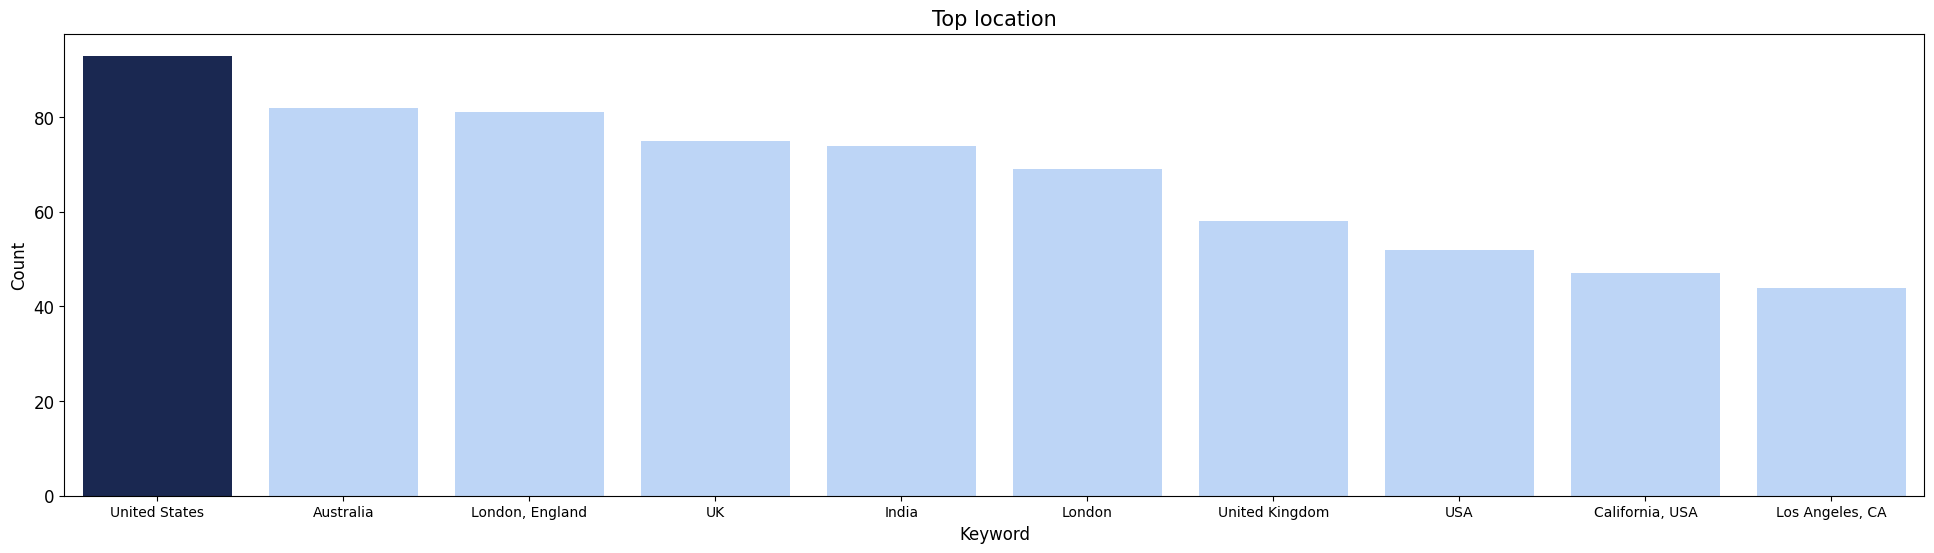

In [ ]:
# visualizing the location_count
fig, ax = plt.subplots(figsize=(24, 6))
colors = ["#11235A", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF", "#B4D4FF"]

sns.barplot(x='index', y='count', data=location_count_df.head(10), palette=colors, hue="index", legend="auto")

plt.title("Top location", loc="center", fontsize=15)
plt.xlabel("Keyword", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.show()

In [ ]:
# exploration to count the amount of data for each target
target_count = raw_df['target'].value_counts().reset_index(name='count')
print(target_count)

   index  count
0      0   9154
1      1   2071


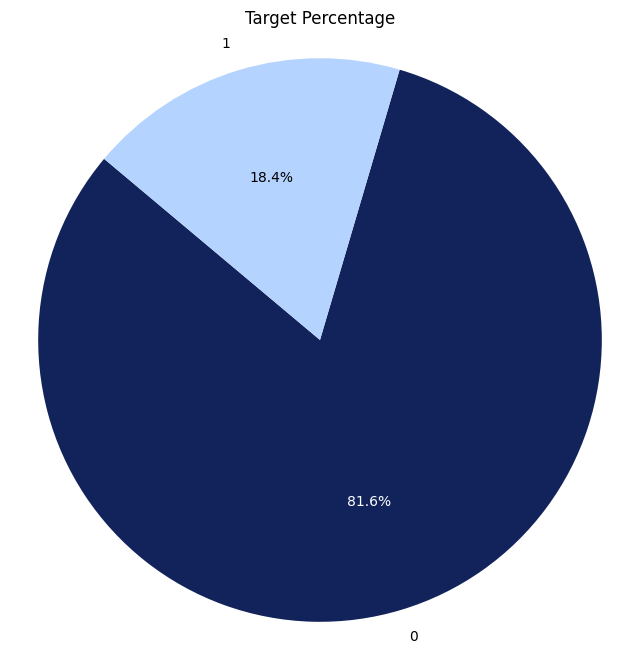

In [ ]:
# visualizing the target_count
labels = target_count.index
sizes = target_count["count"]
colors = ["#11235A", "#B4D4FF"]

plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
max_index = sizes.idxmax()
autotexts[max_index].set_color('white')
plt.title('Target Percentage')

plt.axis('equal')

plt.show()

## Word Preprocessing

In [ ]:
df = raw_df

In [ ]:
df.set_index('id')

,keyword,location,text,target
id,,,,
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...
11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0


In [ ]:
df.drop(columns=['keyword', 'location'], axis=1, inplace = True)

In [ ]:
def preprocess(text):
    # Check if the input is a string
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        text = re.sub(r'https://\S+', '', text)
        text = re.sub(r'#', '', text)
        return text
    else:
        # If not a string
        return str(text)

In [ ]:
df['clean_text'] = df['text'].apply(preprocess)

In [ ]:
# To verify if it's working correctly
df

,id,text,target,clean_text
0,0,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana stones ...
1,1,Telangana: Section 144 has been imposed in Bha...,1,telangana section 144 has been imposed in bhai...
2,2,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...
3,3,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...
4,4,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pardon...
...,...,...,...,...
11365,11365,Media should have warned us well in advance. T...,0,media should have warned us well in advance th...
11366,11366,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin a...
11367,11367,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin a...
11368,11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,ok who remember outcast nd the dora au those a...


## The NLP Thing (Tokenization and Stop Words)

In [ ]:
# Tokenizing
nltk.download('punkt')
df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df

,id,text,target,clean_text,tokens
0,0,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana stones ...,"[communal, violence, in, bhainsa, telangana, s..."
1,1,Telangana: Section 144 has been imposed in Bha...,1,telangana section 144 has been imposed in bhai...,"[telangana, section, 144, has, been, imposed, ..."
2,2,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...,"[arsonist, sets, cars, ablaze, at, dealership,..."
3,3,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...,"[arsonist, sets, cars, ablaze, at, dealership,..."
4,4,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pardon...,"[lord, jesus, your, love, brings, freedom, and..."
...,...,...,...,...,...
11365,11365,Media should have warned us well in advance. T...,0,media should have warned us well in advance th...,"[media, should, have, warned, us, well, in, ad..."
11366,11366,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin a...,"[i, feel, directly, attacked, i, consider, moo..."
11367,11367,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin a...,"[i, feel, directly, attacked, i, consider, moo..."
11368,11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,ok who remember outcast nd the dora au those a...,"[ok, who, remember, outcast, nd, the, dora, au..."


In [ ]:
# Stop Words
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to remove stop words
def remove_stopwords(df, column_name):
    # Apply the stop word removal to each row in the specified column
    df['cleaned_column'] = df[column_name].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

    return df
df = remove_stopwords(df, 'tokens')

In [ ]:
df

,id,text,target,clean_text,tokens,cleaned_column
0,0,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana stones ...,"[communal, violence, in, bhainsa, telangana, s...","[communal, violence, bhainsa, telangana, stone..."
1,1,Telangana: Section 144 has been imposed in Bha...,1,telangana section 144 has been imposed in bhai...,"[telangana, section, 144, has, been, imposed, ...","[telangana, section, 144, imposed, bhainsa, ja..."
2,2,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...,"[arsonist, sets, cars, ablaze, at, dealership,...","[arsonist, sets, cars, ablaze, dealership, htt..."
3,3,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...,"[arsonist, sets, cars, ablaze, at, dealership,...","[arsonist, sets, cars, ablaze, dealership, htt..."
4,4,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pardon...,"[lord, jesus, your, love, brings, freedom, and...","[lord, jesus, love, brings, freedom, pardon, f..."
...,...,...,...,...,...,...
11365,11365,Media should have warned us well in advance. T...,0,media should have warned us well in advance th...,"[media, should, have, warned, us, well, in, ad...","[media, warned, us, well, advance, wrecked, wh..."
11366,11366,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin a...,"[i, feel, directly, attacked, i, consider, moo...","[feel, directly, attacked, consider, moonbin, ..."
11367,11367,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin a...,"[i, feel, directly, attacked, i, consider, moo...","[feel, directly, attacked, consider, moonbin, ..."
11368,11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,ok who remember outcast nd the dora au those a...,"[ok, who, remember, outcast, nd, the, dora, au...","[ok, remember, outcast, nd, dora, au, au, wrec..."


In [ ]:
def join_tokenized_words(row):
    return ' '.join(row)

# Apply the function to create the new 'joined_column'
df['joined_column'] = df['cleaned_column'].apply(join_tokenized_words)

## Vectorizing and Splitting

In [ ]:
X = df['joined_column']
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

## Metrics/Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score
def metrics(y_true, y_pred):
  # print('Accuracy Score: ', accuracy_score(y_true, y_pred))
  print('AUC ROC Score: ', roc_auc_score(y_true, y_pred))
  print('F1 Score: ', f1_score(y_true, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
def cfmatrix(y_true, y_pred):
  confusion_matrix_df = pd.DataFrame((confusion_matrix(y_true, y_pred)), ('Non-Disaster', 'Disaster'), ('Non-Disaster', 'Disaster'))

  plt.figure()
  heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
  heatmap.yaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

  plt.title('Confusion Matrix', fontsize=18, color='darkblue')
  plt.ylabel('True label', fontsize=14)
  plt.xlabel('Predicted label', fontsize=14)
  plt.show()

## Modelling

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fitting
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prediction
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [ ]:
# Evaluation
print("Metrics for Train Dataset")
metrics(y_train, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)

Metrics for Train Dataset
AUC ROC Score:  0.7025602653522343
F1 Score:  0.5753307725138712

Metrics for Test Dataset
AUC ROC Score:  0.667128387381041
F1 Score:  0.4965034965034965


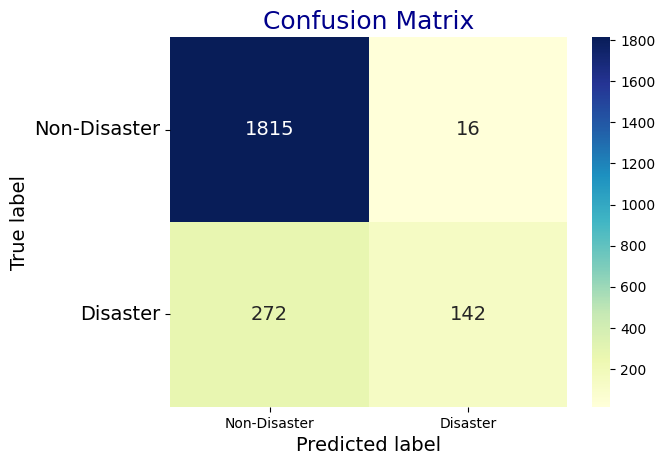

In [ ]:
cfmatrix(y_test, y_pred_test)

### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Create an SVM model
svm_model = SVC()

# Create GridSearchCV instance
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best ROC AUC: {:.2f}%".format(grid_search.best_score_ * 100))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test ROC AUC of Best Model: {:.2f}%".format(test_accuracy * 100))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best ROC AUC: 88.85%
Test ROC AUC of Best Model: 89.84%


In [ ]:
# Fitting
svm_best = SVC(C=10.0, gamma=1, kernel='rbf')
svm_best.fit(X_train, y_train)

# Prediction
y_pred_train = svm_best.predict(X_train)
y_pred_test = svm_best.predict(X_test)

In [ ]:
# Evaluation
print("Metrics for Train Dataset")
metrics(y_train, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)

Metrics for Train Dataset
AUC ROC Score:  0.9993282216701194
F1 Score:  0.9990944763054633

Metrics for Test Dataset
AUC ROC Score:  0.7517426658962527
F1 Score:  0.6534954407294833


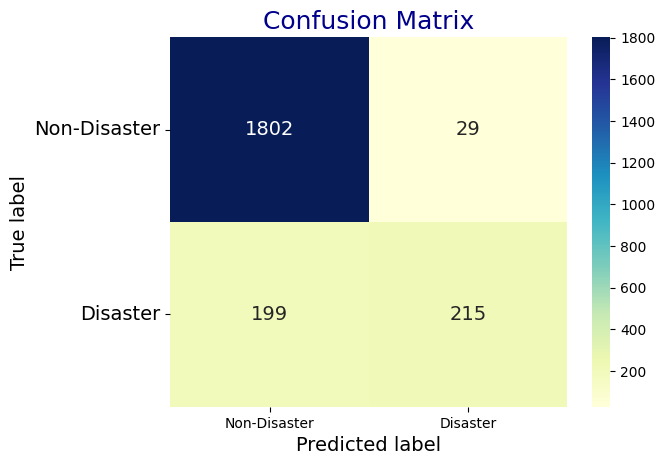

In [ ]:
cfmatrix(y_test, y_pred_test)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Fitting
random_forest = RandomForestClassifier(max_depth = 10, n_estimators = 50, class_weight = 'balanced')
random_forest.fit(X_train, y_train)

# Prediction
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

In [ ]:
# Evaluation
print("Metrics for Train Dataset")
metrics(y_train, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)

Metrics for Train Dataset
AUC ROC Score:  0.787676306271582
F1 Score:  0.672674605728999

Metrics for Test Dataset
AUC ROC Score:  0.7210316423801572
F1 Score:  0.5504358655043587


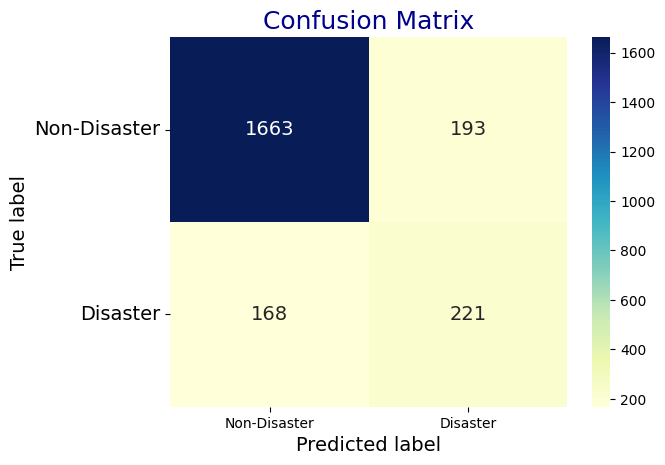

In [ ]:
cfmatrix(y_pred_test, y_test)

## K Fold Cross Validation

In [ ]:
models = []
models.append(('Logistic Regression', logreg))
models.append(('SVM', svm_best))
models.append(('Random Forest Classifier', random_forest))

In [ ]:
from sklearn import model_selection
acc_score=[]
auc_score=[]
pre_results=[]
f1_results=[]
names=[]
result_col=pd.DataFrame(columns=['Algorithm','recall','ROC','Precision','f1_score'])
result_col

i=0
for name, model in models:
    kfold=model_selection.KFold(n_splits=10)
    names.append(name)
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold,scoring="recall")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold,scoring="roc_auc")
    cv_pre_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold,scoring="precision")
    cv_f1_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold,scoring="f1")
    acc_score.append(cv_acc_results)
    auc_score.append(cv_auc_results)
    pre_results.append(cv_pre_results)
    f1_results.append(cv_f1_results)

    result_col.loc[i]=[name,round(cv_acc_results.mean()*100,2),
                           round(cv_auc_results.mean()*100,2),
                           round(cv_pre_results.mean()*100,2),
                           round(cv_f1_results.mean()*100,2)]
    i+=1

result_col.sort_values(by=['ROC'],ascending=False)

,Algorithm,recall,ROC,Precision,f1_score
1,SVM,46.72,90.08,89.82,61.38
0,Logistic Regression,25.25,89.62,94.49,39.61
2,Random Forest Classifier,51.68,82.36,63.31,56.79


In [ ]:
acc_score=[]
auc_score=[]
pre_results=[]
f1_results=[]
names=[]
result_col=pd.DataFrame(columns=['Algorithm','recall','ROC','Precision','f1_score'])
result_col

i=0
for name, model in models:
    kfold=model_selection.KFold(n_splits=10)
    names.append(name)
    cv_acc_results = model_selection.cross_val_score(model, X_test, y_test,cv=kfold,scoring="recall")
    cv_auc_results = model_selection.cross_val_score(model, X_test, y_test,cv=kfold,scoring="roc_auc")
    cv_pre_results = model_selection.cross_val_score(model, X_test, y_test,cv=kfold,scoring="precision")
    cv_f1_results = model_selection.cross_val_score(model, X_test, y_test,cv=kfold,scoring="f1")
    acc_score.append(cv_acc_results)
    auc_score.append(cv_auc_results)
    pre_results.append(cv_pre_results)
    f1_results.append(cv_f1_results)

    result_col.loc[i]=[name,round(cv_acc_results.mean()*100,2),
                           round(cv_auc_results.mean()*100,2),
                           round(cv_pre_results.mean()*100,2),
                           round(cv_f1_results.mean()*100,2)]
    i+=1

result_col.sort_values(by=['ROC'],ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Algorithm,recall,ROC,Precision,f1_score
0,Logistic Regression,2.51,84.80,70.00,4.82
1,SVM,23.39,84.75,88.53,36.53
2,Random Forest Classifier,29.51,76.83,63.76,42.54
